In [115]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


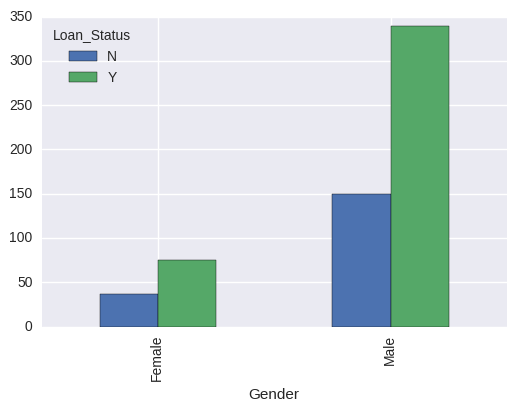

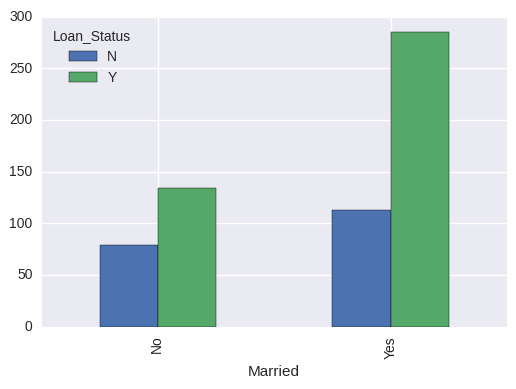

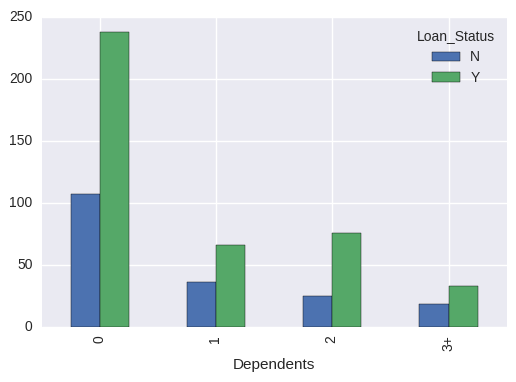

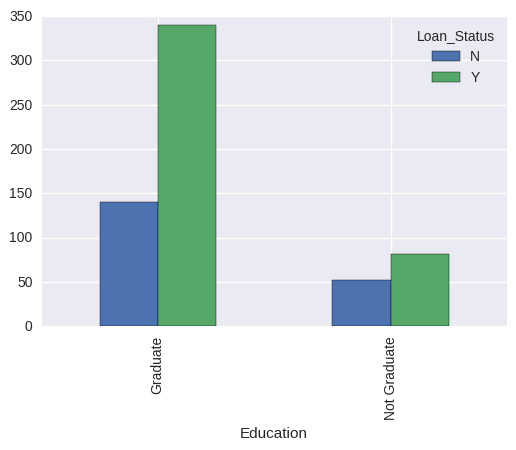

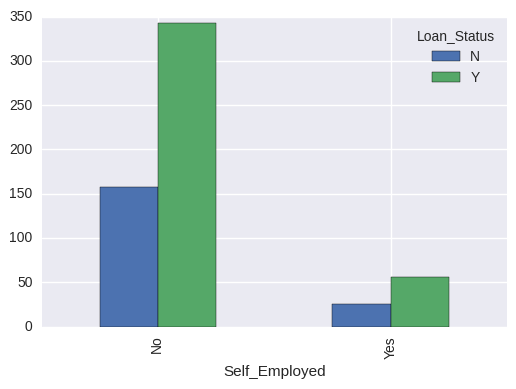

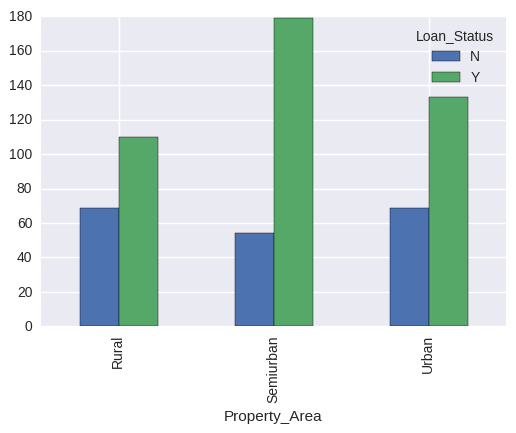

In [6]:
for col in train.columns[1:-1]:
    if train[col].dtype == 'object':        
        dfn = train.groupby([col, 'Loan_Status'])[col].count().unstack('Loan_Status')
        dfn.plot(kind='bar', stacked=False)

In [7]:
train[train.Loan_Status=='Y'].ApplicantIncome.mean()

5384.0687203791467

In [8]:
train[train.Loan_Status=='N'].ApplicantIncome.mean()

5446.078125

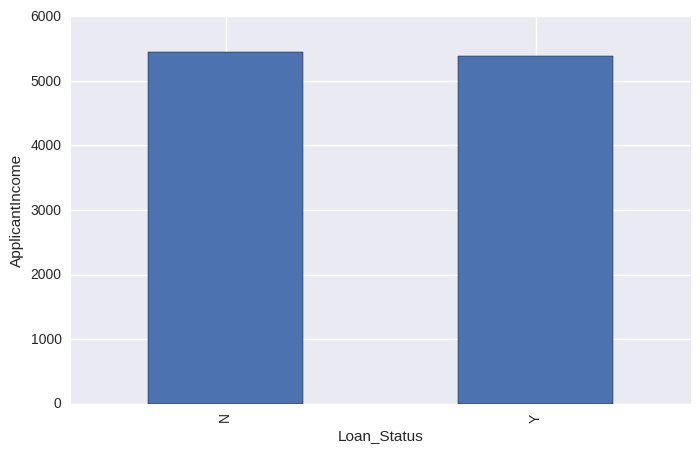

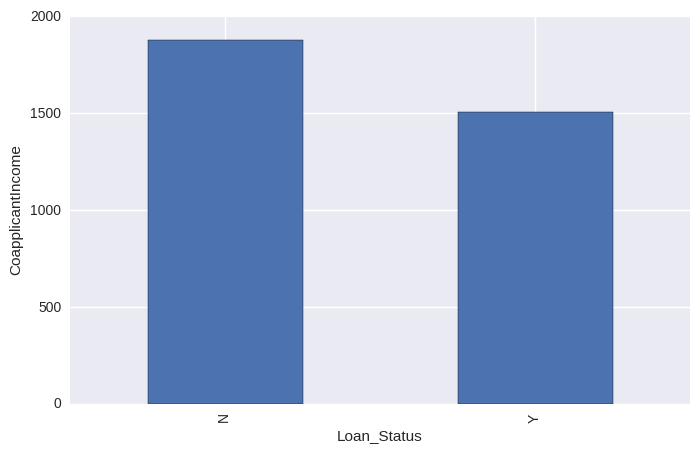

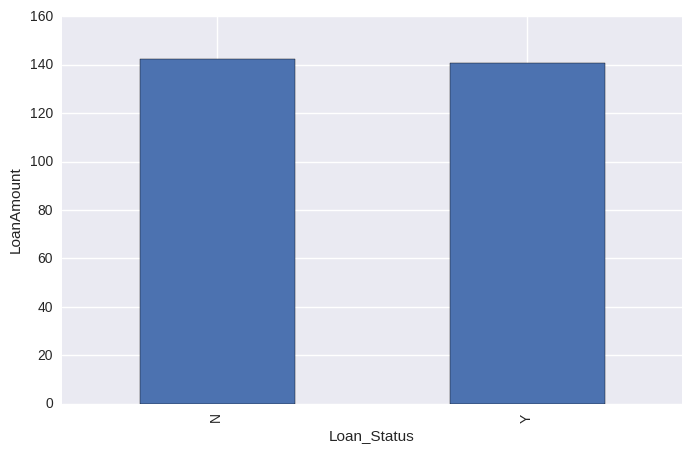

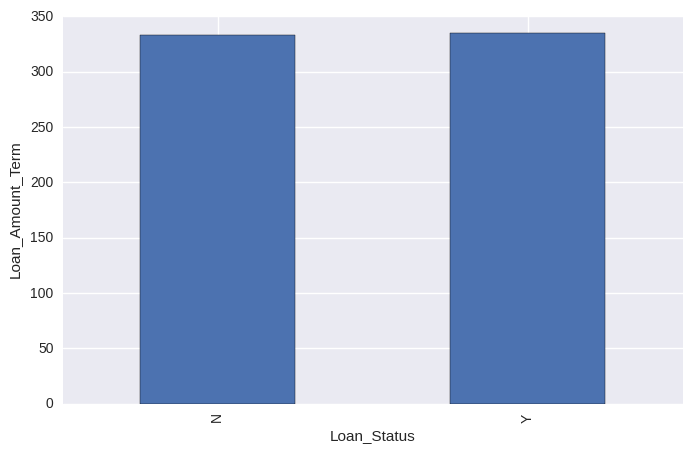

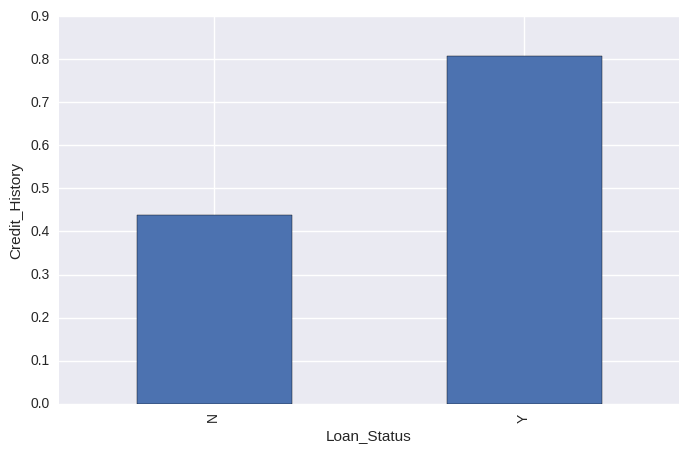

In [10]:
for n, col in enumerate(train.columns[1:-1]):    
    if train[col].dtype != 'object': 
        plt.figure(figsize=(8, 5))
        ax = train[[col, 'Loan_Status']].fillna(-1).groupby('Loan_Status')[col].agg('mean').plot(kind='bar')
        ax.set_ylabel(col)
        plt.figure(n)

In [11]:
train.shape, test.shape

((614, 13), (367, 12))

In [12]:
for col in test.columns:
    print (col, test[col].isnull().sum())

('Loan_ID', 0)
('Gender', 11)
('Married', 0)
('Dependents', 10)
('Education', 0)
('Self_Employed', 23)
('ApplicantIncome', 0)
('CoapplicantIncome', 0)
('LoanAmount', 5)
('Loan_Amount_Term', 6)
('Credit_History', 29)
('Property_Area', 0)


In [13]:
train.Credit_History

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      0.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
16     NaN
17     0.0
18     1.0
19     1.0
20     0.0
21     1.0
22     0.0
23     0.0
24     NaN
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
      ... 
584    0.0
585    1.0
586    1.0
587    1.0
588    1.0
589    0.0
590    1.0
591    1.0
592    1.0
593    1.0
594    1.0
595    1.0
596    1.0
597    0.0
598    1.0
599    1.0
600    NaN
601    1.0
602    1.0
603    1.0
604    1.0
605    1.0
606    1.0
607    1.0
608    1.0
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, dtype: float64

In [14]:
import feature_engineering

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
train.LoanAmount.isnull().sum()

22

In [18]:
tmp = train.LoanAmount.copy()

In [19]:
tmp.mean()

146.41216216216216

In [20]:
tmp.mode()

0    120.0
dtype: float64

In [21]:
tmp = tmp.fillna(tmp.mean())

In [22]:
tmp.isnull().sum()

0

In [23]:
train.columns

Index([u'Loan_ID', u'Gender', u'Married', u'Dependents', u'Education',
       u'Self_Employed', u'ApplicantIncome', u'CoapplicantIncome',
       u'LoanAmount', u'Loan_Amount_Term', u'Credit_History', u'Property_Area',
       u'Loan_Status'],
      dtype='object')

In [25]:
from imp import reload
reload(feature_engineering)
X, y, test_id, test = feature_engineering.main(overwrite=False)

In [27]:
X.shape

(614, 392)

In [28]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [29]:
def impute(data):
	for col in data.columns:		
		data[col] = data[col].fillna('empty') if data[col].dtype == 'object' \
					else data[col].fillna(data[col].mean())
	return data

In [30]:
test_id = test.Loan_ID

y = train.Loan_Status

mp = {'Y': 1, 'N': 0}
y = y.map(mp)
train.drop(['Loan_Status', 'Loan_ID'], axis=1, inplace=True)

data = pd.concat([train, test])

In [31]:
data.shape

(981, 12)

In [32]:
data

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,NaN,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,NaN,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,NaN,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,NaN,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,NaN,No,Urban,No
5,5417,4196.0,1.0,2,Graduate,Male,267.0,360.0,NaN,Yes,Urban,Yes
6,2333,1516.0,1.0,0,Not Graduate,Male,95.0,360.0,NaN,Yes,Urban,No
7,3036,2504.0,0.0,3+,Graduate,Male,158.0,360.0,NaN,Yes,Semiurban,No
8,4006,1526.0,1.0,2,Graduate,Male,168.0,360.0,NaN,Yes,Urban,No
9,12841,10968.0,1.0,1,Graduate,Male,349.0,360.0,NaN,Yes,Semiurban,No


In [33]:
tmp = pd.get_dummies(data)

In [35]:
tmp.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,...,Loan_ID_LP002980,Loan_ID_LP002986,Loan_ID_LP002989,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes
0,5849,0.0,1.0,NaN,360.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,4583,1508.0,1.0,128.0,360.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,3000,0.0,1.0,66.0,360.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,2583,2358.0,1.0,120.0,360.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,6000,0.0,1.0,141.0,360.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [36]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [37]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [38]:
loan_id = pd.concat([train.Loan_ID, test.Loan_ID])

In [55]:
test.Loan_ID.isin(train.Loan_ID).sum()

0

In [56]:
from imp import reload
reload(feature_engineering)
X, y, test_id, test = feature_engineering.main(overwrite=False)

In [57]:
X.shape

(614, 24)

In [58]:
y.shape

(614,)

In [59]:
test.shape

(367, 24)

In [60]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
model.fit(X, y) 

TSNE(angle=0.5, early_exaggeration=4.0, init='random', learning_rate=1000.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=30,
   perplexity=30.0, random_state=0, verbose=0)

In [62]:
nx = model.fit_transform(X, y)

In [63]:
nx

array([[-11.760528  , -20.32858785],
       [-17.14801277,  11.25621581],
       [ -2.93088164, -13.94450848],
       ..., 
       [ 12.83784885, -11.89888392],
       [ 20.35839644, -10.78830079],
       [  7.7853672 ,  14.59673612]])

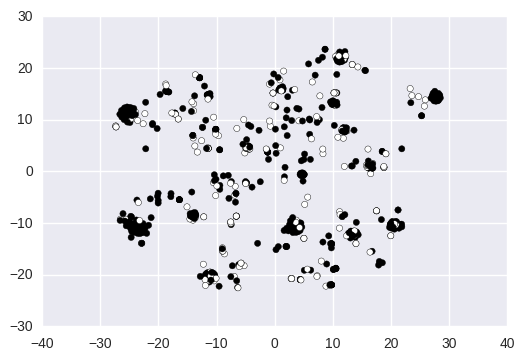

In [70]:
plt.scatter(nx[:, 0], nx[:, 1], c=y)

In [91]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold, train_test_split
import feature_engineering
import numpy as np
import os
import pandas as pd
import time
import xgboost as xgb

n_splits = 5
final_accuracy = 0
random_state = 1971

X, y, test_id, test = feature_engineering.main(overwrite=False)
print (X.shape)
# exit()
predictions = np.zeros((test.shape[0], n_splits))
loan_status = []

model = LogisticRegression()


skf = StratifiedKFold(n_splits=n_splits, random_state=random_state)
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
   X_train, x_valid = X[train_index, :], X[test_index, :]
   y_train, y_valid = y[train_index], y[test_index]
   model.fit(X_train, y_train)
   accuracy = accuracy_score(y_valid, model.predict(x_valid))   
   predictions[:, fold] = model.predict(test).astype(int)   
   final_accuracy += accuracy
   print ('fold %d Accuracy %f'%(fold, accuracy))

(614, 24)
fold 0 Accuracy 0.806452
fold 1 Accuracy 0.758065
fold 2 Accuracy 0.786885
fold 3 Accuracy 0.860656
fold 4 Accuracy 0.819672


In [98]:
from scipy.stats import mode
print (mode(predictions, axis=1))[0].astype(int)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]


In [99]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [100]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
test_id = test.Loan_ID

y = train.Loan_Status

mp = {'Y': 1, 'N': 0}
y = y.map(mp)
train.drop(['Loan_Status'], axis=1, inplace=True)

data = pd.concat([train, test])
data.drop(['Loan_ID'], axis=1, inplace=True)

data = impute(data)	

In [102]:
data = pd.get_dummies(data)

In [106]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Gender_empty,Married_No,Married_Yes,...,Dependents_3+,Dependents_empty,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_empty,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,142.51153,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,4583,1508.0,128.00000,360.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3000,0.0,66.00000,360.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2583,2358.0,120.00000,360.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,6000,0.0,141.00000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [107]:
data['avg_applicant_inc_coapp_inc'] = (data.ApplicantIncome+data.CoapplicantIncome) /2.0

In [109]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Gender_empty,Married_No,Married_Yes,...,Dependents_empty,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_empty,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,avg_applicant_inc_coapp_inc
0,5849,0.0,142.51153,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2924.5
1,4583,1508.0,128.00000,360.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3045.5
2,3000,0.0,66.00000,360.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1500.0
3,2583,2358.0,120.00000,360.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2470.5
4,6000,0.0,141.00000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3000.0


In [112]:
data.Loan_Amount_Term.value_counts.unique()

AttributeError: 'function' object has no attribute 'unique'

In [133]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
test_id = test.Loan_ID

y = train.Loan_Status

mp = {'Y': 1, 'N': 0}
y = y.map(mp)
train.drop(['Loan_Status'], axis=1, inplace=True)

data = pd.concat([train, test])
data.drop(['Loan_ID'], axis=1, inplace=True)

data = impute(data)	
data = pd.get_dummies(data)

cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        col1, col2 = cols[i], cols[j]
        data[col1+'+'+col2] = data[col1] + data[col2]
        data[col1+'-'+col2] = data[col1] - data[col2]
        data[col1+'*'+col2] = data[col1] * data[col2]
        data[col1+'/'+col2] = data[col1] / (1.0 + data[col2])

In [134]:
data.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Gender_empty,Married_No,Married_Yes,Married_empty,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_empty,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_empty,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome+CoapplicantIncome,ApplicantIncome-CoapplicantIncome,ApplicantIncome*CoapplicantIncome,ApplicantIncome/CoapplicantIncome,ApplicantIncome+LoanAmount,ApplicantIncome-LoanAmount,ApplicantIncome*LoanAmount,ApplicantIncome/LoanAmount,CoapplicantIncome+LoanAmount,CoapplicantIncome-LoanAmount,CoapplicantIncome*LoanAmount,CoapplicantIncome/LoanAmount
0,5849,0.0,142.51153,360.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5849.0,5849.0,0.0,5849.000000,5991.51153,5706.48847,8.335499e+05,40.756307,142.51153,-142.51153,0.0,0.000000
1,4583,1508.0,128.00000,360.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6091.0,3075.0,6911164.0,3.037111,4711.00000,4455.00000,5.866240e+05,35.527132,1636.00000,1380.00000,193024.0,11.689922
2,3000,0.0,66.00000,360.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3000.0,3000.0,0.0,3000.000000,3066.00000,2934.00000,1.980000e+05,44.776119,66.00000,-66.00000,0.0,0.000000
3,2583,2358.0,120.00000,360.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4941.0,225.0,6090714.0,1.094955,2703.00000,2463.00000,3.099600e+05,21.347107,2478.00000,2238.00000,282960.0,19.487603
4,6000,0.0,141.00000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6000.0,6000.0,0.0,6000.000000,6141.00000,5859.00000,8.460000e+05,42.253521,141.00000,-141.00000,0.0,0.000000
5,5417,4196.0,267.00000,360.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,9613.0,1221.0,22729732.0,1.290684,5684.00000,5150.00000,1.446339e+06,20.212687,4463.00000,3929.00000,1120332.0,15.656716
6,2333,1516.0,95.00000,360.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3849.0,817.0,3536828.0,1.537904,2428.00000,2238.00000,2.216350e+05,24.302083,1611.00000,1421.00000,144020.0,15.791667
7,3036,2504.0,158.00000,360.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5540.0,532.0,7602144.0,1.211976,3194.00000,2878.00000,4.796880e+05,19.094340,2662.00000,2346.00000,395632.0,15.748428
8,4006,1526.0,168.00000,360.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5532.0,2480.0,6113156.0,2.623445,4174.00000,3838.00000,6.730080e+05,23.704142,1694.00000,1358.00000,256368.0,9.029586
9,12841,10968.0,349.00000,360.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,23809.0,1873.0,140840088.0,1.170663,13190.00000,12492.00000,4.481509e+06,36.688571,11317.00000,10619.00000,3827832.0,31.337143


In [135]:
data.shape

(981, 36)

In [123]:
data.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Gender_empty,Married_No,Married_Yes,Married_empty,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_empty,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_empty,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,f1,f2,f3,f4
0,0.072210,0.000000,0.193215,0.746835,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.055394,0.000121,0.203585,0.223958
1,0.056580,0.036192,0.172214,0.746835,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.058435,0.000141,0.000117,0.190551
2,0.037037,0.000000,0.082489,0.746835,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.019583,0.000108,0.094282,0.200303
3,0.031889,0.056592,0.160637,0.746835,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.043980,0.000244,0.000069,0.223159
4,0.074074,0.000000,0.191027,0.746835,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.057292,0.000117,0.201426,0.215333
5,0.066877,0.100703,0.373372,0.746835,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.102705,0.000260,0.000087,0.257995
6,0.028802,0.036384,0.124457,0.746835,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.030255,0.000212,0.000086,0.227071
7,0.037481,0.060096,0.215630,0.746835,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.051510,0.000275,0.000086,0.265381
8,0.049457,0.036624,0.230101,0.746835,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.051409,0.000219,0.000153,0.283817
9,0.158531,0.263230,0.492041,0.746835,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.281141,0.000137,0.000042,0.127204


In [257]:
reload(feature_engineering)

from sklearn.ensemble import GradientBoostingClassifier

n_splits = 5
final_accuracy = 0
random_state = 1971

X, y, test_id, test = feature_engineering.main(overwrite=False)
print (X.shape)
# exit()
predictions = np.zeros((test.shape[0], n_splits))
loan_status = []

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=6, random_state=0)
skf = StratifiedKFold(n_splits=n_splits, random_state=random_state)

(614, 22)


In [258]:
X.shape, y.shape

((614, 22), (614,))

fold 0 Accuracy 0.806452
[ 0.01625966  0.00966079  0.0287221   0.03859668  0.45452679  0.00603428
  0.0065239   0.01316715  0.01814622  0.00435186  0.0590999   0.08620347
  0.04333713  0.0229615   0.01107282  0.032966    0.01312432  0.01156091
  0.0127147   0.07148326  0.01008722  0.02939935]
fold 1 Accuracy 0.725806
[  1.42360121e-02   5.62947922e-03   1.45223852e-02   4.46450236e-02
   5.34422186e-01   3.89089538e-05   4.95980651e-05   1.34753590e-02
   1.65304632e-02   1.78318710e-02   4.71079431e-02   7.59521457e-02
   9.19796434e-03   1.54277814e-02   3.21729651e-02   3.67906254e-02
   1.83584220e-02   2.94883835e-02   5.29353271e-03   4.60274408e-02
   6.50830382e-03   1.62932058e-02]
fold 2 Accuracy 0.778689
[  5.62982174e-03   4.84979435e-03   3.49235728e-02   2.20725080e-02
   5.38414117e-01   1.96236804e-03   1.48674303e-03   6.95861302e-03
   1.81200882e-02   1.23785206e-06   5.25085671e-02   7.99828269e-02
   2.94143886e-02   9.25692848e-03   2.30881127e-02   3.75785978e-02

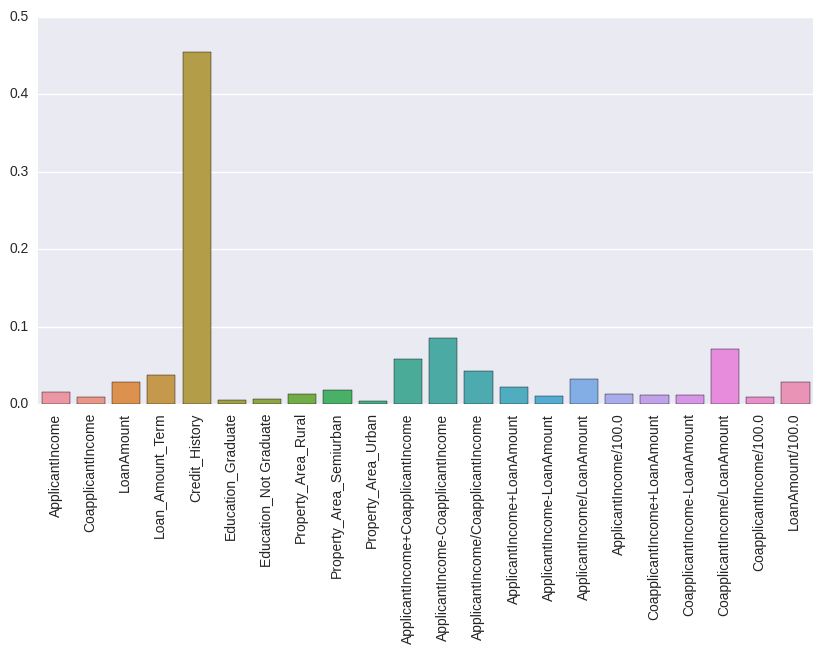

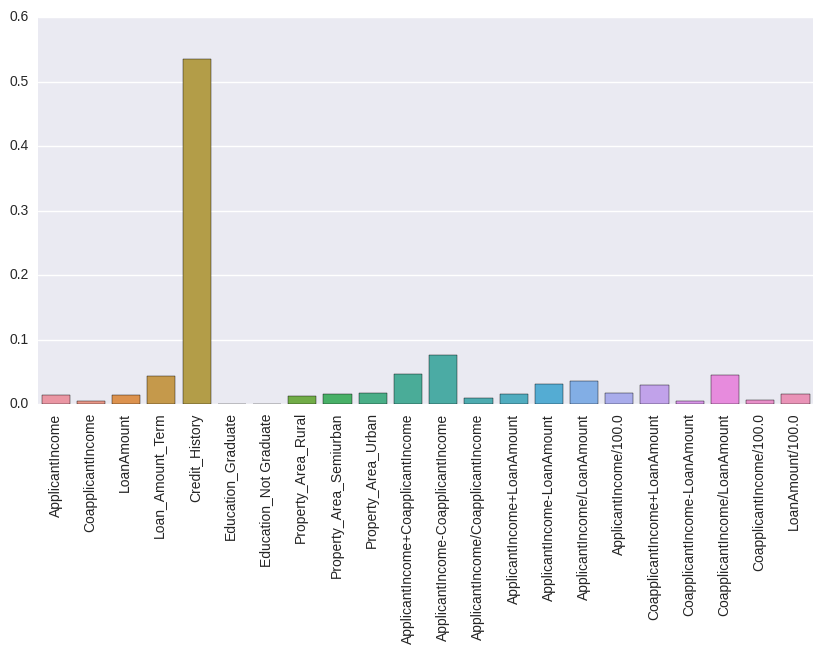

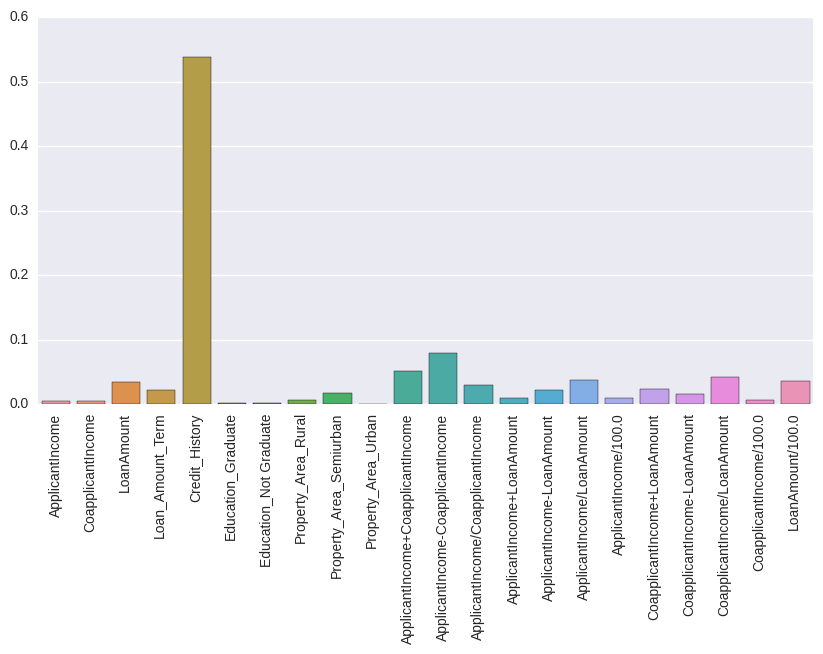

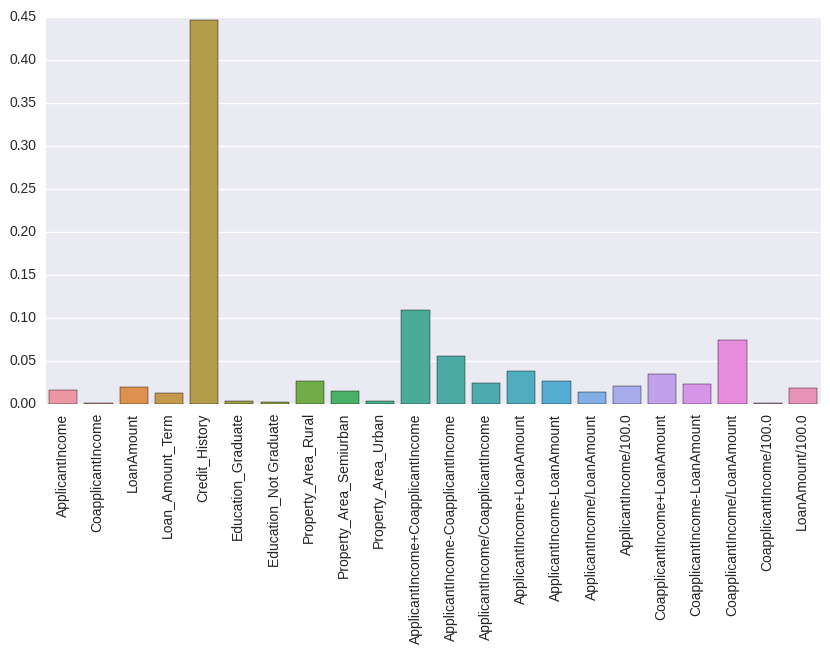

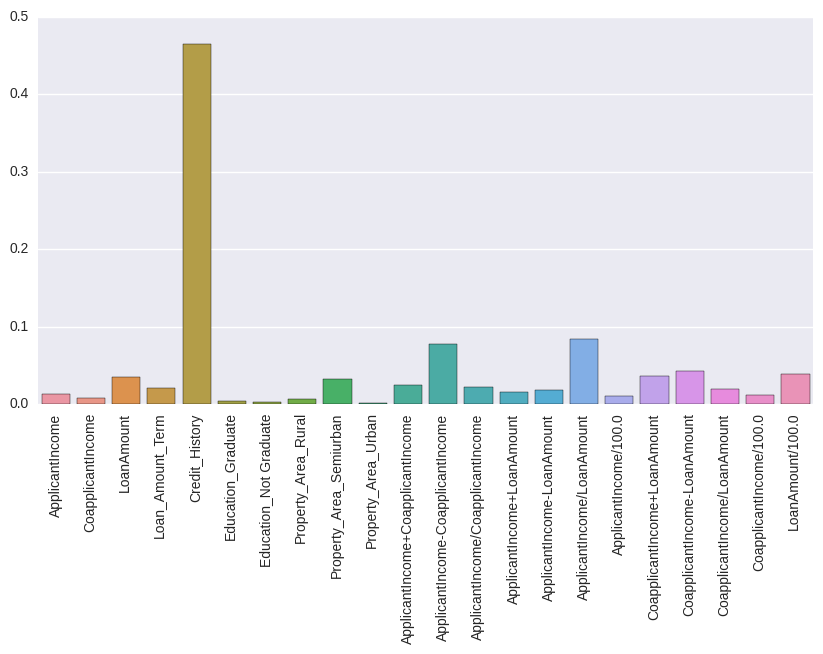

In [259]:

for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
   
   X_train, x_valid = X.as_matrix()[train_index, :], X.as_matrix()[test_index, :]
   y_train, y_valid = y[train_index], y[test_index]
   model.fit(X_train, y_train)
   accuracy = accuracy_score(y_valid, model.predict(x_valid))   
   predictions[:, fold] = model.predict(test)   
   final_accuracy += accuracy
   print ('fold %d Accuracy %f'%(fold, accuracy))
   print (model.feature_importances_)
   plt.figure(figsize=(10, 5))
   g = sns.barplot(x=X.columns, y = model.feature_importances_)
   plt.xticks(rotation=90)
   plt.figure(fold)
#    plt.bar.plt()
#    break

In [194]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
test_id = test.Loan_ID

y = train.Loan_Status

mp = {'Y': 1, 'N': 0}
y = y.map(mp)
train.drop(['Loan_Status'], axis=1, inplace=True)

data = pd.concat([train, test])
data.drop(['Loan_ID'], axis=1, inplace=True)

data = impute(data)	
data = pd.get_dummies(data)

In [195]:
view = data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
print (view.head())
view = pd.DataFrame(poly.fit_transform(view))
data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], axis=1, inplace=True)

   ApplicantIncome  CoapplicantIncome  LoanAmount
0             5849                0.0   142.51153
1             4583             1508.0   128.00000
2             3000                0.0    66.00000
3             2583             2358.0   120.00000
4             6000                0.0   141.00000


In [216]:
data.reset_index(drop=True, inplace=True)
view.reset_index(drop=True, inplace=True)

In [219]:
view = view.loc[:, 1:]

In [223]:
tmp = pd.concat([data, view], axis=1)

In [224]:
tmp.shape

(981, 30)

In [226]:
tmp.head(5)

,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Gender_empty,Married_No,Married_Yes,Married_empty,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_empty,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_empty,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,1,2,3,4,5,6,7,8,9
0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5849.0,0.0,142.51153,34210801.0,0.0,833549.9413,0.0,0.0,20309.536296
1,360.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4583.0,1508.0,128.00000,21003889.0,6911164.0,586624.0000,2274064.0,193024.0,16384.000000
2,360.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3000.0,0.0,66.00000,9000000.0,0.0,198000.0000,0.0,0.0,4356.000000
3,360.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2583.0,2358.0,120.00000,6671889.0,6090714.0,309960.0000,5560164.0,282960.0,14400.000000
4,360.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6000.0,0.0,141.00000,36000000.0,0.0,846000.0000,0.0,0.0,19881.000000


In [265]:
train[['ApplicantIncome', 'CoapplicantIncome']].head()

,ApplicantIncome,CoapplicantIncome
0,5849,0.0
1,4583,1508.0
2,3000,0.0
3,2583,2358.0
4,6000,0.0


In [267]:
train.CoapplicantIncome.apply(lambda x: int(x == 0))

0      1
1      0
2      1
3      0
4      1
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     1
16     1
17     1
18     1
19     0
20     1
21     0
22     0
23     0
24     0
25     1
26     0
27     0
28     1
29     0
      ..
584    0
585    0
586    0
587    1
588    1
589    1
590    0
591    1
592    1
593    0
594    1
595    1
596    0
597    1
598    1
599    1
600    0
601    0
602    1
603    0
604    1
605    0
606    0
607    0
608    0
609    1
610    1
611    0
612    1
613    1
Name: CoapplicantIncome, dtype: int64

In [268]:
train.columns

Index([u'Loan_ID', u'Gender', u'Married', u'Dependents', u'Education',
       u'Self_Employed', u'ApplicantIncome', u'CoapplicantIncome',
       u'LoanAmount', u'Loan_Amount_Term', u'Credit_History',
       u'Property_Area'],
      dtype='object')

In [269]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

train.columns

Index([u'Loan_ID', u'Gender', u'Married', u'Dependents', u'Education',
       u'Self_Employed', u'ApplicantIncome', u'CoapplicantIncome',
       u'LoanAmount', u'Loan_Amount_Term', u'Credit_History', u'Property_Area',
       u'Loan_Status'],
      dtype='object')

In [272]:
train.Credit_History, y

(0      1.0
 1      1.0
 2      1.0
 3      1.0
 4      1.0
 5      1.0
 6      1.0
 7      0.0
 8      1.0
 9      1.0
 10     1.0
 11     1.0
 12     1.0
 13     1.0
 14     1.0
 15     1.0
 16     NaN
 17     0.0
 18     1.0
 19     1.0
 20     0.0
 21     1.0
 22     0.0
 23     0.0
 24     NaN
 25     1.0
 26     1.0
 27     1.0
 28     1.0
 29     1.0
       ... 
 584    0.0
 585    1.0
 586    1.0
 587    1.0
 588    1.0
 589    0.0
 590    1.0
 591    1.0
 592    1.0
 593    1.0
 594    1.0
 595    1.0
 596    1.0
 597    0.0
 598    1.0
 599    1.0
 600    NaN
 601    1.0
 602    1.0
 603    1.0
 604    1.0
 605    1.0
 606    1.0
 607    1.0
 608    1.0
 609    1.0
 610    1.0
 611    1.0
 612    1.0
 613    0.0
 Name: Credit_History, dtype: float64, 0      1
 1      0
 2      1
 3      1
 4      1
 5      1
 6      1
 7      0
 8      1
 9      0
 10     1
 11     1
 12     1
 13     0
 14     1
 15     1
 16     1
 17     0
 18     0
 19     1
 20     0
 21     1
 22     0


In [273]:
train.Property_Area

0          Urban
1          Rural
2          Urban
3          Urban
4          Urban
5          Urban
6          Urban
7      Semiurban
8          Urban
9      Semiurban
10         Urban
11         Urban
12         Urban
13         Rural
14         Urban
15         Urban
16         Urban
17         Urban
18         Rural
19         Urban
20         Urban
21         Urban
22     Semiurban
23         Rural
24     Semiurban
25     Semiurban
26     Semiurban
27         Urban
28         Urban
29     Semiurban
         ...    
584        Rural
585        Rural
586        Urban
587    Semiurban
588    Semiurban
589    Semiurban
590    Semiurban
591    Semiurban
592    Semiurban
593        Rural
594        Urban
595        Rural
596        Rural
597    Semiurban
598        Rural
599        Urban
600        Urban
601        Rural
602        Urban
603        Rural
604    Semiurban
605        Urban
606    Semiurban
607        Rural
608        Rural
609        Rural
610        Rural
611        Urb

In [274]:
train.columns

Index([u'Loan_ID', u'Gender', u'Married', u'Dependents', u'Education',
       u'Self_Employed', u'ApplicantIncome', u'CoapplicantIncome',
       u'LoanAmount', u'Loan_Amount_Term', u'Credit_History', u'Property_Area',
       u'Loan_Status'],
      dtype='object')

In [275]:
train.Credit_History.isnull().sum()

50

In [277]:
df_train = train.drop(['Loan_ID', 'Loan_Status'], axis=1)

In [282]:
df_train = pd.get_dummies(df_train)

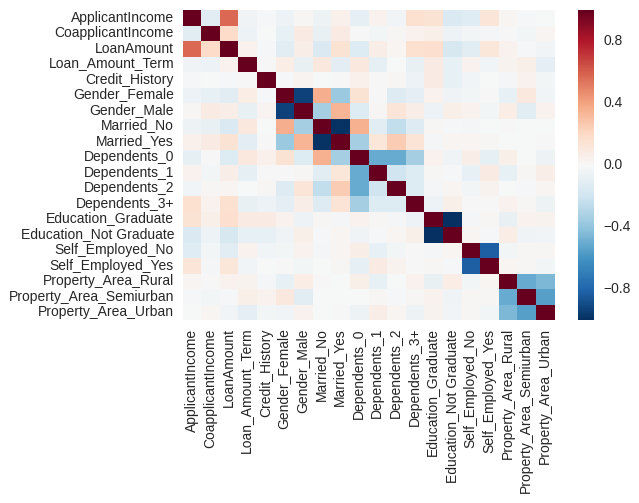

In [283]:
corrmat = df_train.corr()
sns.heatmap(corrmat)